In [1]:
!pip install datasets
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# Data Cleanup (not needed for all problems but good to do anyways)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [2]:
df.groupby('job_title_short')['salary_year_avg'].median().sort_values()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Software Engineer             99150.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Data Engineer                125000.0
Data Scientist               127500.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Name: salary_year_avg, dtype: float64

In [3]:
df.groupby('job_title_short')['salary_year_avg'].mean().sort_values()

job_title_short
Business Analyst              91082.612833
Data Analyst                  93841.907854
Cloud Engineer               111268.453846
Software Engineer            113393.760054
Senior Data Analyst          113911.363665
Machine Learning Engineer    126774.315972
Data Engineer                130125.604250
Data Scientist               135988.837171
Senior Data Engineer         145840.611624
Senior Data Scientist        154206.292996
Name: salary_year_avg, dtype: float64

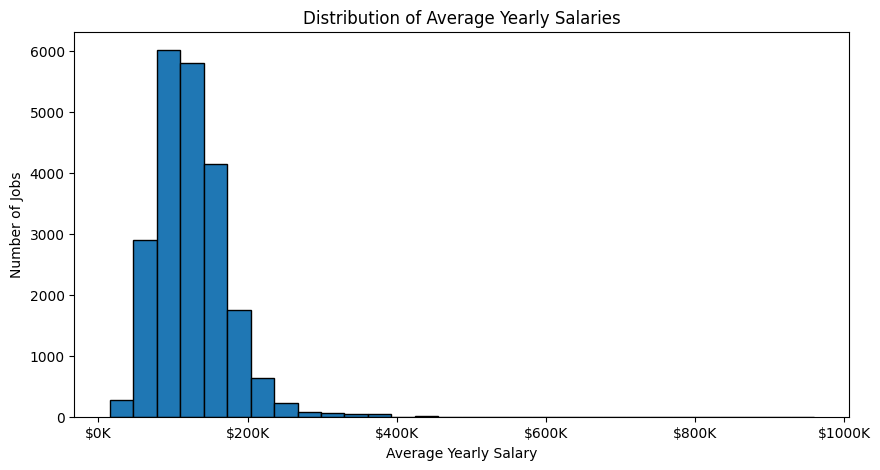

In [5]:
from matplotlib.ticker import FuncFormatter

# Drop rows with NA values in 'salary_year_avg'
df_nan = df.dropna(subset=['salary_year_avg'])

# Define the formatter function
def to_k(x, pos):
  """Convert number to string with 'K' as thousands."""
  return f'${int(x/1000)}K'

# Create formatter using FuncFormatter
formatter = FuncFormatter(to_k)

# Create histogram
plt.figure(figsize=(10,5))
plt.hist(df_nan['salary_year_avg'], bins=30, edgecolor='black')

# Set title and labels
plt.title('Distribution of Average Yearly Salaries')
plt.xlabel('Average Yearly Salary')
plt.ylabel('Number of Jobs')

# Apply the formatter to the x-axis
plt.gca().xaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

Because of the outliers above $400k the average is dragged higher, and so it's not as reflective as the median.

In [6]:
job_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values()

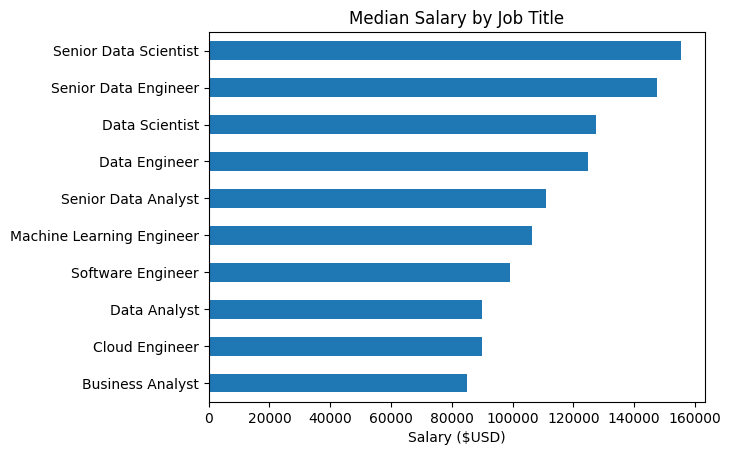

In [8]:
job_salary.plot(kind='barh')
plt.xlabel('Salary ($USD)')
plt.ylabel('')
plt.title('Median Salary by Job Title')
plt.show()